# Part I - (Prosper Loan Data)
## by (Hillary Kipngeno)

## Introduction
> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others
## Preliminary Wrangling


In [62]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [63]:
#Load the dataset
prosperloan=pd.read_csv("prosperLoanData.csv")

In [64]:
#Convert column names to lowercase
prosperloan.columns=prosperloan.columns.str.lower()

In [65]:
prosperloan.head()

,listingkey,listingnumber,listingcreationdate,creditgrade,term,loanstatus,closeddate,borrowerapr,borrowerrate,lenderyield,...,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [66]:
prosperloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listingkey                           113937 non-null  object 
 1   listingnumber                        113937 non-null  int64  
 2   listingcreationdate                  113937 non-null  object 
 3   creditgrade                          28953 non-null   object 
 4   term                                 113937 non-null  int64  
 5   loanstatus                           113937 non-null  object 
 6   closeddate                           55089 non-null   object 
 7   borrowerapr                          113912 non-null  float64
 8   borrowerrate                         113937 non-null  float64
 9   lenderyield                          113937 non-null  float64
 10  estimatedeffectiveyield              84853 non-null   float64
 11  estimatedloss

In [67]:
prosperloan.describe()

,listingnumber,term,borrowerapr,borrowerrate,lenderyield,estimatedeffectiveyield,estimatedloss,estimatedreturn,prosperrating (numeric),prosperscore,...,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [68]:
#convert prosperscore to ordered category type
list=[1,2,3,4,5,6,7,8,9,10]
order=pd.api.types.CategoricalDtype(ordered=True, categories=list)
prosperloan.prosperscore=prosperloan.prosperscore.astype(order)

In [69]:
prosperloan["datecreditpulled"] = prosperloan["datecreditpulled"].astype('datetime64[ns]')

In [70]:
prosperloan["datecreditpulled"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: datecreditpulled
Non-Null Count   Dtype         
--------------   -----         
113937 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 890.3 KB


In [71]:
prosperloan["listingcreationdate"] = prosperloan["listingcreationdate"].astype('datetime64[ns]')

In [72]:
prosperloan["listingcreationdate"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: listingcreationdate
Non-Null Count   Dtype         
--------------   -----         
113937 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 890.3 KB


In [73]:
prosperloan.term=prosperloan.term.astype("category")

In [74]:
prosperloan.term.info()

<class 'pandas.core.series.Series'>
RangeIndex: 113937 entries, 0 to 113936
Series name: term
Non-Null Count   Dtype   
--------------   -----   
113937 non-null  category
dtypes: category(1)
memory usage: 111.5 KB


### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting the loan amount of the customers in the dataset

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that prosper score will affect the original loan amount, i also think that other features like EmploymentStatus, ProsperScore, DebtToIncomeRatio,term,BorrowerRate, isborrowerhomeowner,isingroup and borrowerstate.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [75]:
prosperloan.loanoriginalamount.value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: loanoriginalamount, Length: 2468, dtype: int64

In [131]:
#create a function for histplots
#define the function and the params
def histplot(data,x,bins,title,xlabel,ylabel):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    #what to be returned by the function
    return plt.hist(data=data, x=x,bins=bins)


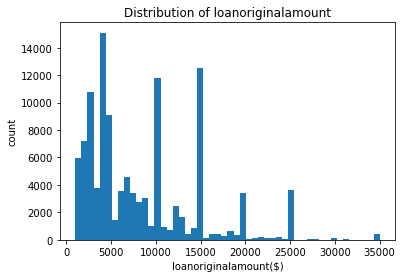

In [132]:
#Distribution of loanoriginalamount
bins=50
histplot(prosperloan,"loanoriginalamount",bins,"Distribution of loanoriginalamount","loanoriginalamount($)","count" );
#plt.xlabel("loan original amount")
#plt.ylabel("count");


loanoriginalamount has a long tail distribution with a high frequency at the low orinal loan amaount end.

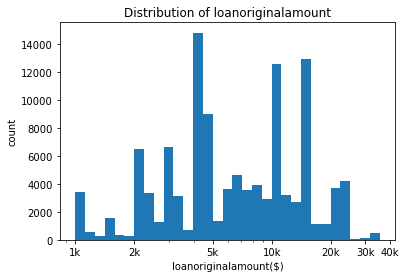

In [87]:
#original loan amount distribution
log_binsize = 0.05
#create the bins
bins = 10 ** np.arange(3, np.log10(prosperloan['loanoriginalamount'].max())+log_binsize, log_binsize)
#create the plot using the function
histplot(prosperloan,"loanoriginalamount",bins,"Distribution of loanoriginalamount","loanoriginalamount($)","count" )
#use a log scale
plt.xscale("log")
plt.xticks([ 1e3, 2e3, 5e3, 1e4,2e4,3e4,4e4], [ '1k', '2k', '5k', '10k','20k','30k','40k']);

when you use the log scale the distribution becomes multimodal.there is a steep jump in frequency right before 5k.there are other spikes across the distribution.

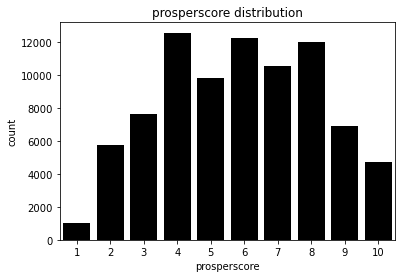

In [106]:
#plot the distribution of prosperscore
#create the plot
sb.countplot(data=prosperloan,x="prosperscore", color="black")
#create the labels
plt.title("prosperscore distribution")
plt.xlabel("prosperscore")
plt.ylabel("count");

The distribution of properscore takes a normal distribution.

In [111]:
order=prosperloan.employmentstatus.value_counts().index

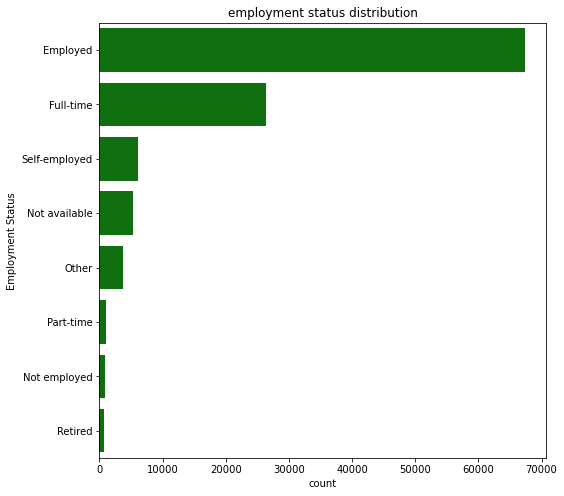

In [112]:
#distribution of employment status
plt.figure(figsize=[8,8])
prosperloan.employmentstatus.value_counts()
sb.countplot(data=prosperloan, y="employmentstatus", order=order, color="green")
plt.ylabel("Employment Status")
plt.xlabel("count")
plt.title("employment status distribution");

in the employment status distribution, employed is with the highest frequency and the least being retired.

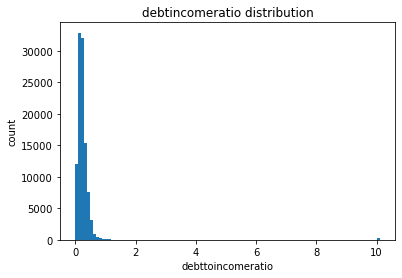

In [113]:
#Distribution of debttoincome ratio
#creating the number of bins
bins2=np.arange(0,prosperloan.debttoincomeratio.max()+0.1,0.1)
#creating the plot and plot labels
histplot(prosperloan,"debttoincomeratio",bins2,"debtincomeratio distribution","debttoincomeratio","count" );

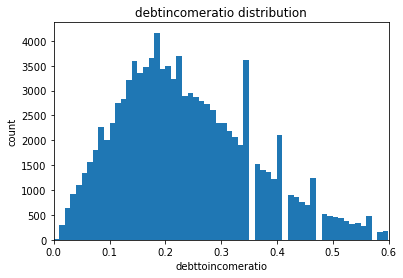

In [114]:
#Distribution of debttoincome ratio
#create the bins
bins2=np.arange(0,prosperloan.debttoincomeratio.max()+0.01,0.01)
#create the plots and labels
histplot(prosperloan,"debttoincomeratio",bins2,"debtincomeratio distribution","debttoincomeratio","count" )
#limit the x_axis to be between 0 and 0.6
plt.xlim(0,0.6);

The debttoincomeratio distribution has a steep between 0.1 and 0.2. and has a long tail to the right, after limiting the x- axis between 0 and 0.6  the distribution  is normal and skewed to the right

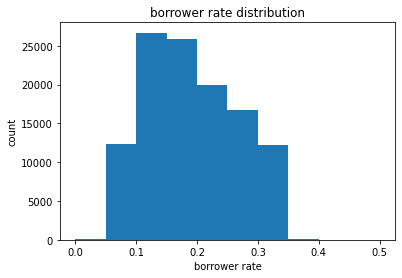

In [115]:
#Distibution of borrowerrate
bins=np.arange(0,prosperloan.borrowerrate.max()+0.05,0.05)
histplot(prosperloan,"borrowerrate",bins,"borrower rate distribution","borrower rate","count" );

The borrowerrate is uimodal but skewed to the right.The frequency increases with borrowerrate from 0.1 to 0.2but drops post 0.2
to 0.4.

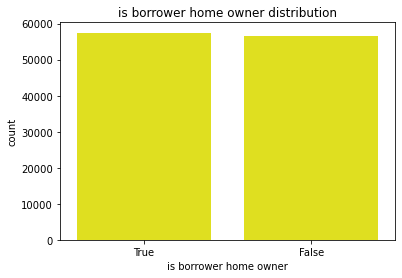

In [116]:
#isborrowerhomeowner distribution
sb.countplot(data=prosperloan, x="isborrowerhomeowner",color="yellow",order=prosperloan["isborrowerhomeowner"].value_counts().index)
plt.xlabel("is borrower home owner")
plt.ylabel("count")
plt.title("is borrower home owner distribution");
#plt.pie(prosperloan["isborrowerhomeowner"].value_counts(), wedgeprops = {'width' : 0.4}, labels=labels, startangle=90, counterclock=False);

There is almost equal distribution of borrowers who are home owners and those who are not

In [117]:
order=prosperloan.borrowerstate.value_counts().index

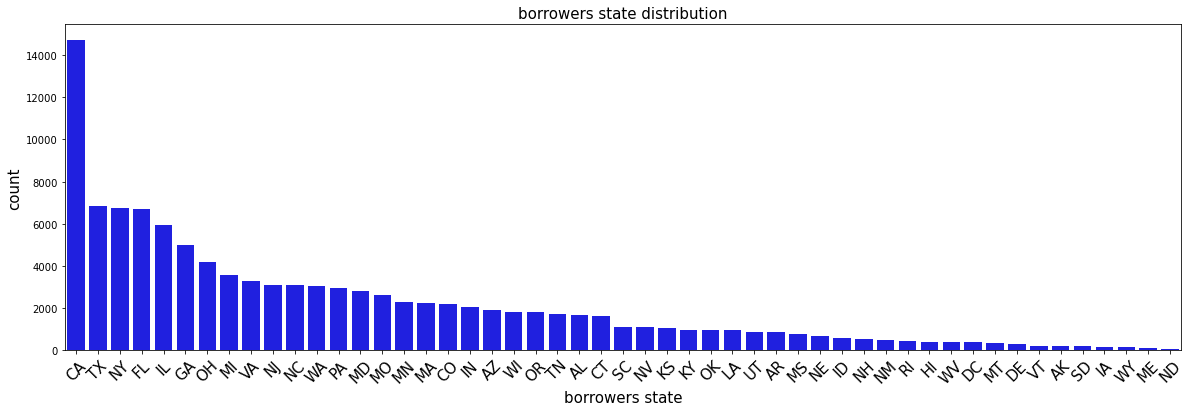

In [118]:
#Distribution of borrowerstate
plt.figure(figsize=[20,6]) 
sb.countplot(data=prosperloan, x="borrowerstate", order=order, color="blue")
plt.xlabel("borrowers state", fontsize=15)
plt.ylabel("count", fontsize=15)
plt.title("borrowers state distribution", fontsize=15)
plt.xticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xticks(rotation=45);

califonia is the state with the highest frequency and north dakota is with the least frequency

(array([0, 1, 2]), [Text(0, 0, '12'), Text(1, 0, '36'), Text(2, 0, '60')])

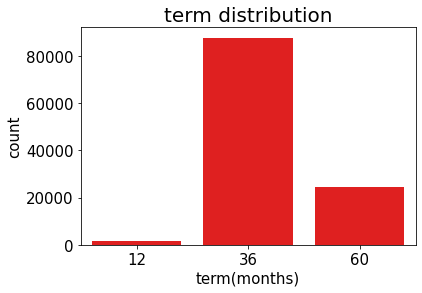

In [119]:
#Distribution of term
sb.countplot(data=prosperloan, x="term", color="red")
plt.xlabel("term(months)", fontsize=15)
plt.ylabel("count", fontsize=15)
plt.title("term distribution" , fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

The frequency is least at 12 months and there is a steep increase in frequency with the term of 36 and drops again with term of 60 months.

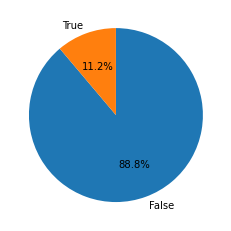

In [120]:
#currently in group distribution
labels=prosperloan["currentlyingroup"].value_counts().index
plt.pie(prosperloan["currentlyingroup"].value_counts(), autopct='%1.1f%%', labels=labels, startangle=90, counterclock=False);

 The distribution of currentlyingroup have a high frequency of those who who are not currently in group with those who are currently in group with less frequency.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

    > With the loanoriginalamount there was a long tail end so i had to transform the scale to a log scale, when plotted on a logscale,the distribubution is multimodal with alot of spikes across the distribution

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> With the debt income ratio most of the distribution was between debtincimeratio of 0 and 0.6. there was an unusual debtibcomeratio of 10 at the very end. since this might just be an outlier i chose to concentrate on the debtincomeratio between 0 and 0.6 by setting the Xlimit  between 0 and 0.6. This brings forth a normal distribution of the debtincomeratio.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

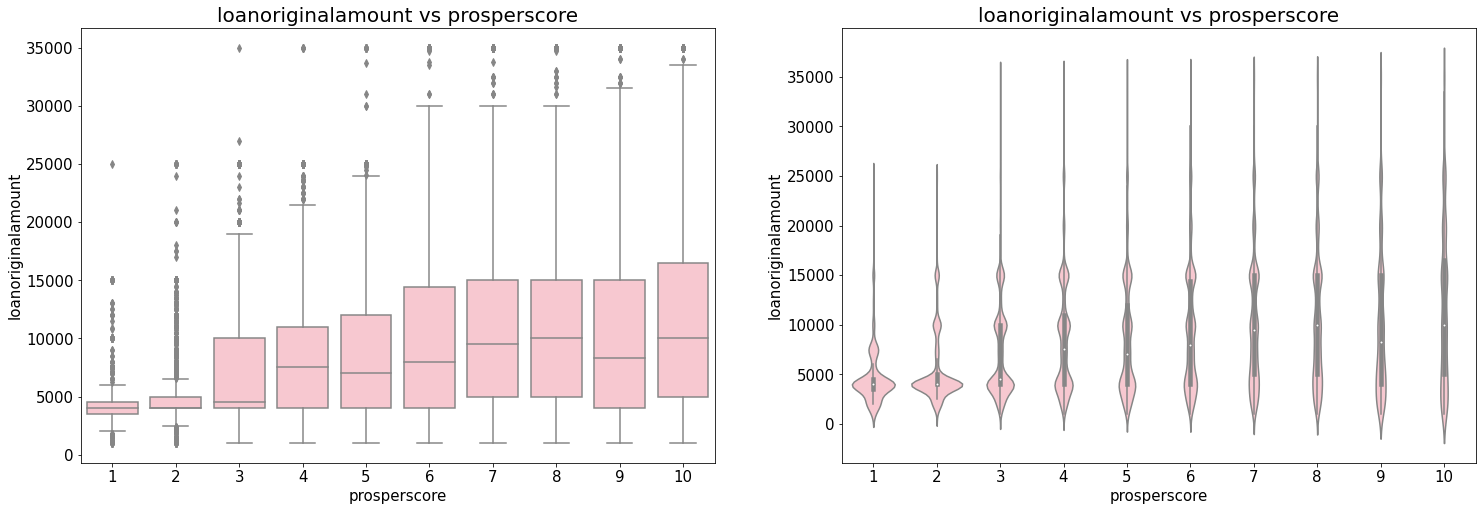

In [121]:
#relationship between loanoriginalamount and prosperscore
plt.figure(figsize=[25,8])
plt.subplot(1,2,1)
#creating a plot
sb.boxplot(data=prosperloan, x="prosperscore", y="loanoriginalamount", color="pink")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("prosperscore", fontsize=15)
plt.ylabel("loanoriginalamount",fontsize=15)
plt.title("loanoriginalamount vs prosperscore",fontsize=20 )
#create the second plot
plt.subplot(1,2,2)
sb.violinplot(data=prosperloan, x="prosperscore", y="loanoriginalamount",color="pink")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("prosperscore", fontsize=15)
plt.ylabel("loanoriginalamount",fontsize=15)
plt.title("loanoriginalamount vs prosperscore",fontsize=20 );

This shows that there is a positive relationship between loanoriginalamout and prosperscore. As the prosperscore increases the original loan amount increases too.

In [122]:
#Taking a subset of the dataset
np.random.seed(3)
new=prosperloan.sample(1000)

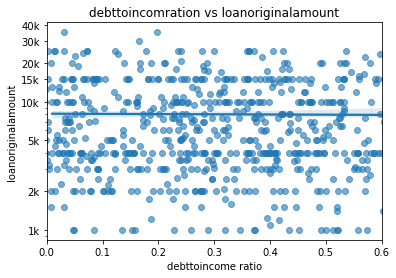

In [123]:
#relationship between loanoriginalamount and debttoincomeratio
sb.regplot(data=new, x="debttoincomeratio", y="loanoriginalamount", scatter_kws=({"alpha":0.6}), x_jitter=0.4)
plt.xlabel("debttoincome ratio")
plt.ylabel("loanoriginalamount")
#Changin the yscale to log
plt.yscale("log")
plt.yticks([ 1e3, 2e3, 5e3, 1e4,15e3,2e4,3e4,4e4], [ '1k', '2k', '5k', '10k','15k','20k','30k','40k'])
plt.xlim(0,0.6)
plt.title("debttoincomration vs loanoriginalamount");

there appears to be a near zero correlation between debttoincomeratio and loanoriginalamount.

In [124]:
prosperloan.borrowerrate.min()

0.0

In [125]:
np.random.seed(1)
new1=prosperloan.sample(500)

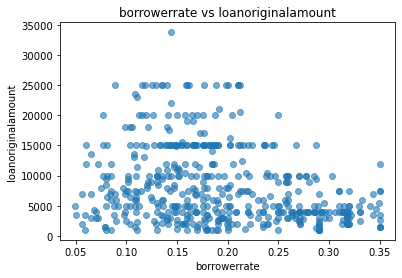

In [126]:
#relationship between loanoriginalamount and borrowerrate
plt.scatter(data=new1, x="borrowerrate", y="loanoriginalamount", alpha=0.6)
plt.xlabel("borrowerrate")
plt.ylabel("loanoriginalamount")
plt.title("borrowerrate vs loanoriginalamount");

There is a negative relationship between borrower rate and loan original amount. As the borrower rate increases the loan original loan amount decreases.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>The loanoriginalamount has a positive correlation with prosperscore. When there is a positive increase in prosperscore ther is  also a positive increase is the loan original amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> There is a zero correlatio between debttoincome and loanoriginal amount, the is a negative correlation between borrowe rate and loa original amount.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

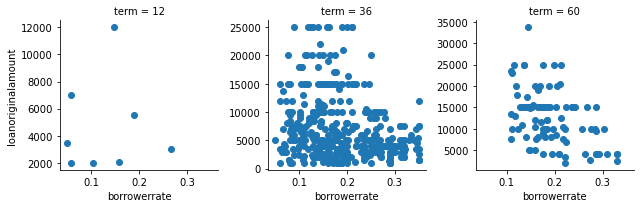

In [127]:
#creating a facetgrid for term, borrowerrate and loanoriginalamount
plt.figure(figsize=[8,8])
g=sb.FacetGrid(data=new1, col="term", size=3, sharey=False)
g.map(plt.scatter, "borrowerrate", "loanoriginalamount")
g.set_ylabels;

the correlation between loanoriginalamount and negative in all the three terms

In [128]:
#creating a subset of the dataset
np.random.seed(1)
last=prosperloan.sample(500)

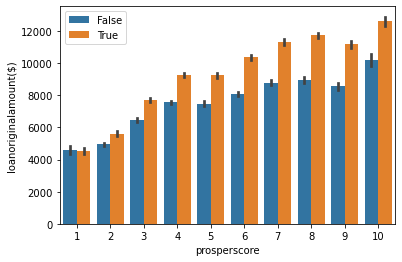

In [129]:
#creating a multivariate  barchart  for prosperscore, loanoriginalamount, isborrowerhomeowner
sb.barplot(data=prosperloan, x="prosperscore", y="loanoriginalamount", hue="isborrowerhomeowner")
plt.xlabel("prosperscore")
plt.ylabel("loanoriginalamount($)")
plt.legend()

loanoriginalamount increases gradually with increase in prosperscore and isborrowerwithhomeowner true is slightly higher than the isborrowerhomeowner false.

C:\Users\User\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


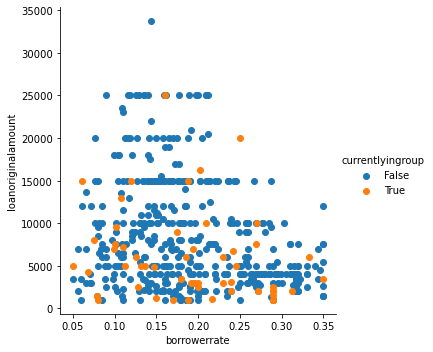

In [130]:
#creating a scatterplot for currently ingroup, borrowerrate and loanoriginalamount
g = sb.FacetGrid(data = last, hue = 'currentlyingroup', size = 5)
g.map(plt.scatter, 'borrowerrate', 'loanoriginalamount')
g.add_legend();

the loanoriginalamount is indirectly proportional to borrowerate with those who are not in any groups having higher loan amounts

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> loanoriginalamount increases gradually with increase in prosperscore and isborrowerwithhomeowner true is slightly higher than the isborrowerhomeowner false.

### Were there any interesting or surprising interactions between features?

> the loanoriginalamount is indirectly proportional to borrowerate with those who are not in any groups having higher loan amounts

## Conclusions

I found out that there is a positive correlation between prosperscore and loanoriginalamount. loan original amount and borrower rate had a negative correlation while loan orignalamount and debttoincome ratio had a near zero correlation